This is a  Route Risk Profiling Project using Unsupervised Learning. The goal of this project is to group rail travel routes based on performance indicators(delay%, cancellation%, avg ticket price), and derive insights from the patterns observed.

Click [here](https://github.com/TeslimahSarayi/NATIONAL-RAIL-SERVICE-ANALYSIS.) for the comprehensive details of the rail service data, and analysis of travel patterns, delay, cancellations and refunds, as well as revenue.

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
#Load route metrics data into a dataframe
route_metrics_df = pd.read_excel('/content/route_metrics.xlsx')

In [ ]:
#Quick look
route_metrics_df.head()

,Route,Total_journeys,Delay_percentage,Cancellation_percentage,Avg_ticket_price
0,Manchester Piccadilly⇒London St Pancras,16,0,0,99.56
1,Bristol Temple Meads⇒Cardiff Central,16,0,0,6.13
2,Birmingham New Street⇒Stafford,190,0,2,7.18
3,London Kings Cross⇒Edinburgh Waverley,163,0,5,37.33
4,Birmingham New Street⇒Tamworth,227,0,7,7.60


In [ ]:
#Select features for clustering
x = route_metrics_df[['Delay_percentage','Cancellation_percentage', 'Avg_ticket_price']]

In [ ]:
#Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#Determine optimal number of clusters(K)

inertia = []
k_range = range(1,11)  #try k from 1 to 10

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state= 42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

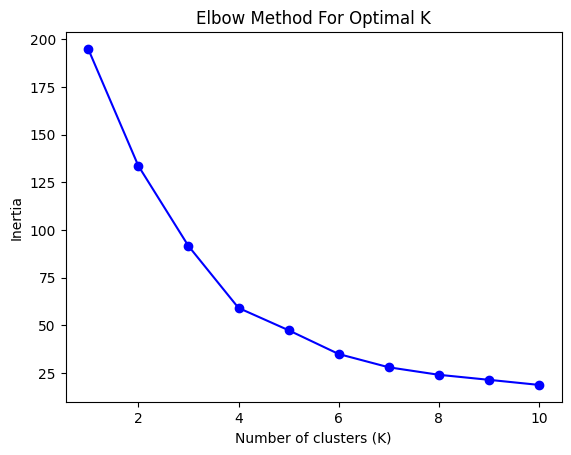

In [ ]:
#Plot the elbow chart
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [ ]:
#K = 3
#fit k-means model

kmeans =KMeans(n_clusters=3, random_state=42)
route_metrics_df['Cluster'] =kmeans.fit_predict(x_scaled)

In [ ]:
#View clusters in dataset
route_metrics_df.head()

,Route,Total_journeys,Delay_percentage,Cancellation_percentage,Avg_ticket_price,Cluster
0,Manchester Piccadilly⇒London St Pancras,16,0,0,99.56,0
1,Bristol Temple Meads⇒Cardiff Central,16,0,0,6.13,1
2,Birmingham New Street⇒Stafford,190,0,2,7.18,1
3,London Kings Cross⇒Edinburgh Waverley,163,0,5,37.33,1
4,Birmingham New Street⇒Tamworth,227,0,7,7.60,1


In [ ]:
#Assign labels
Cluster_labels = {
    0: 'Reliable But Expensive Route',
    1: 'Moderate Risk Route',
    2: 'High Risk Route'
}

route_metrics_df['Cluster_label'] = route_metrics_df['Cluster'].map(Cluster_labels)

In [ ]:
#Summarize clusters
route_metrics_df.groupby('Cluster_label')[['Delay_percentage', 'Cancellation_percentage', 'Avg_ticket_price']].mean().round(2)

,Delay_percentage,Cancellation_percentage,Avg_ticket_price
Cluster_label,,,
High Risk Route,88.00,1.80,58.12
Moderate Risk Route,3.69,4.69,17.08
Reliable But Expensive Route,4.00,2.17,84.11


In [ ]:
#Check for NULLs
route_metrics_df[['Delay_percentage', 'Cancellation_percentage', 'Avg_ticket_price', 'Cluster_label']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delay_percentage         65 non-null     int64  
 1   Cancellation_percentage  65 non-null     int64  
 2   Avg_ticket_price         65 non-null     float64
 3   Cluster_label            65 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.2+ KB


In [ ]:
#Define colors for each cluster label
custom_palette = {
    'Reliable But Expensive Route': '#1f77b4', #Blue
    'Moderate Risk Route': '#2ca02c', #Green
    'High Risk Route':'#ff7f0e' #Orange
}

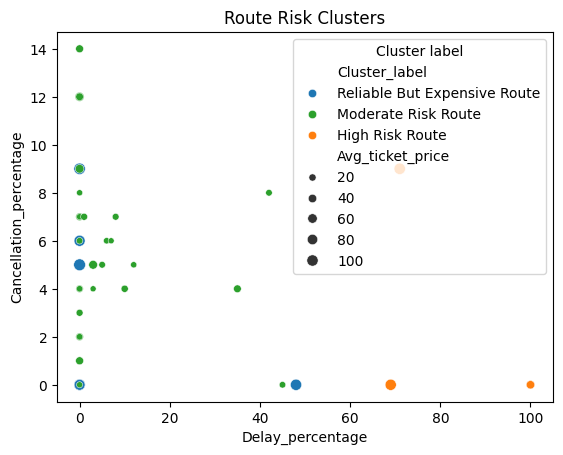

In [ ]:
#Visualise clusters
sns.scatterplot(data = route_metrics_df,
                x = 'Delay_percentage',
                y = 'Cancellation_percentage',
                hue = 'Cluster_label',
                size = 'Avg_ticket_price',
                palette = custom_palette,
                legend = 'brief') #show only hue legend
plt.legend(title = 'Cluster label', loc = 'best')   #ensure legend shows only cluster labels
plt.title('Route Risk Clusters')
plt.show()

Each color in the chart represent a cluster, defined based on:
*   Delay %
*   Cancellation %

*   Average ticket price

Each point on the chart represents a route, positioned based on its delay and cancellation performance.

The clusters are:

Blue - Reliable but Expensive Routes

Green - Moderate Risk Routes

Orange - High Risk Routes









In [ ]:
route_metrics_df = route_metrics_df.drop(columns =['Cluster_labels'])

In [ ]:
#Summary Table - shows Routes and their cluster
route_metrics_df[['Route',  'Cluster_label', 'Delay_percentage', 'Cancellation_percentage', 'Avg_ticket_price']]

,Route,Cluster_label,Delay_percentage,Cancellation_percentage,Avg_ticket_price
0,Manchester Piccadilly⇒London St Pancras,Reliable But Expensive Route,0,0,99.56
1,Bristol Temple Meads⇒Cardiff Central,Moderate Risk Route,0,0,6.13
2,Birmingham New Street⇒Stafford,Moderate Risk Route,0,2,7.18
3,London Kings Cross⇒Edinburgh Waverley,Moderate Risk Route,0,5,37.33
4,Birmingham New Street⇒Tamworth,Moderate Risk Route,0,7,7.60
...,...,...,...,...,...
60,York⇒Leeds,Moderate Risk Route,0,0,4.59
61,Liverpool Lime Street⇒London Paddington,Reliable But Expensive Route,48,0,99.96
62,Liverpool Lime Street⇒Manchester Piccadilly,Moderate Risk Route,3,4,3.98
63,London Paddington⇒London Waterloo,Moderate Risk Route,0,8,5.04


In [ ]:
#Number of routes per cluster
route_metrics_df['Cluster_label'].value_counts()

,count
Cluster_label,
Moderate Risk Route,48
Reliable But Expensive Route,12
High Risk Route,5


In [ ]:
#Identify high risk routes
route_metrics_df[route_metrics_df['Cluster_label'] == 'High Risk Route']

,Route,Total_journeys,Delay_percentage,Cancellation_percentage,Avg_ticket_price,Cluster,Cluster_label
6,Edinburgh Waverley⇒London Kings Cross,51,100,0,41.04,2,High Risk Route
27,York⇒Wakefield,15,100,0,9.87,2,High Risk Route
32,Manchester Piccadilly⇒London Euston,345,69,0,98.14,2,High Risk Route
35,Liverpool Lime Street⇒London Euston,1097,71,9,103.28,2,High Risk Route
47,London Euston⇒York,17,100,0,38.29,2,High Risk Route


### Cluster Interpretation

* **Cluster 1 (Low Delay, Moderate Cancellation, Low Price):** These are moderate-risk routes. Represent the majority. They are relatively affordable and exhibit lower levels of disruption.

* **Cluster 2 (High Delay, Low Cancellation, Moderate Price):** These are high-risk routes. Characterised by high delay rates despite low cancellations. These routes also tend to have above-average ticket prices.

* **Cluster 0 (Low Delay, Low Cancellation, High Price):** These are reliable but expensive routes. Offer consistent reliability but may present pricing concerns due to significantly higher average fares.